In [1]:
import torch 
import pandas as  pd
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

In [4]:
# Cargar dataset
# Columnas del dataset (según la documentación del Adult Dataset en UCI)
# Columnas definidas en el dataset
cols = ["age", "workclass", "fnlwgt", "education", "education-num",
        "marital-status", "occupation", "relationship", "race", "sex",
        "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

df = pd.read_csv("C:\\Users\\LENOVO\\OneDrive\\Desktop\\python\\lab5\\adult.data.txt",
                 names=cols, sep=", ", engine="python")

print("Columnas:", df.columns)
print(df.head())
df.head()

Columnas: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Mal

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
from sklearn.preprocessing import LabelEncoder



# 1. Label encoding para income
le = LabelEncoder()
df["income_multiclass"] = df["sex"] + "_" + df["income"]
df["income_multiclass"] = le.fit_transform(df["income_multiclass"])
print(df["income_multiclass"].value_counts())

# Verificamos las primeras filas
df.head()

income_multiclass
2    15128
0     9592
3     6662
1     1179
Name: count, dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_multiclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [6]:
print("Tipos de datos:\n", df.dtypes)
print(df.columns.tolist())


Tipos de datos:
 age                   int64
workclass            object
fnlwgt                int64
education            object
education-num         int64
marital-status       object
occupation           object
relationship         object
race                 object
sex                  object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income               object
income_multiclass     int64
dtype: object
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'income_multiclass']


In [7]:
# Eliminar columnas no usadas
df = df.drop(columns=["fnlwgt", "native-country", "income"])
categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# Convertir a int
df = df.astype(int)

print(df.head())

   age  workclass  education  education-num  marital-status  occupation  \
0   39          7          9             13               4           1   
1   50          6          9             13               2           4   
2   38          4         11              9               0           6   
3   53          4          1              7               2           6   
4   28          4          9             13               2          10   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             1     4    1          2174             0              40   
1             0     4    1             0             0              13   
2             1     4    1             0             0              40   
3             0     2    1             0             0              40   
4             5     2    0             0             0              40   

   income_multiclass  
0                  2  
1                  2  
2                  2  
3           

In [8]:
X = df.drop("income_multiclass", axis=1).values
y = df["income_multiclass"].values

num_labels = len(np.unique(y))
# Columnas numéricas (continuas + binarias)
# num_cols = ["age", "avg_glucose_level", "bmi", "hypertension", "heart_disease"]

# Columnas categóricas (todo lo demás excepto 'id')
# cat_cols = [col for col in X.columns if col not in num_cols ]
print("Número de clases:", num_labels)

Número de clases: 4


In [9]:
before = df.shape[0]

# Eliminar filas con NaN
df_clean = df.dropna()

# Número de filas después de limpiar
after = df_clean.shape[0]

# Calcular cuántos ejemplos se borraron
removed = before - after

print(f"Filas antes: {before}")
print(f"Filas después: {after}")
print(f"Filas eliminadas: {removed}")

Filas antes: 32561
Filas después: 32561
Filas eliminadas: 0


In [10]:
# 3. Normalización
def featureNormalize(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_norm, mu, sigma = featureNormalize(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])

Tamaño entrenamiento: 26048
Tamaño prueba: 6513


convertir a tensores

In [13]:
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).long()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).long()

In [14]:
class ModelCustom2(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(ModelCustom2, self).__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H, D_out)

    def forward(self, x):
        x1 = self.fc1(x)
        x = self.relu(x1)
        x = self.fc2(x + x1)
        return x

In [18]:
print(X.shape)
print(num_labels)

(32561, 12)
4


In [19]:
model = ModelCustom2(D_in=12, H=100, D_out=4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.2)


epochs = 100
log_each = 10
losses = []

model.train()
for e in range(1, epochs+1):
    # Forward
    y_pred = model(X_train_tensor)

    # Calcular loss
    loss = criterion(y_pred, y_train_tensor)
    losses.append(loss.item())

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % log_each == 0:
        print(f"Epoch {e}/{epochs}, Loss: {np.mean(losses):.5f}")

Epoch 10/100, Loss: 0.62472
Epoch 20/100, Loss: 0.51417
Epoch 30/100, Loss: 0.46908
Epoch 40/100, Loss: 0.44396
Epoch 50/100, Loss: 0.42776
Epoch 60/100, Loss: 0.41636
Epoch 70/100, Loss: 0.40787
Epoch 80/100, Loss: 0.40126
Epoch 90/100, Loss: 0.39596
Epoch 100/100, Loss: 0.39159


In [20]:
from sklearn.metrics import accuracy_score


model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred_test, dim=1)

accuracy = accuracy_score(y_test, y_pred_labels.numpy())
print("Precisión en test:", accuracy)

Precisión en test: 0.8403193612774451


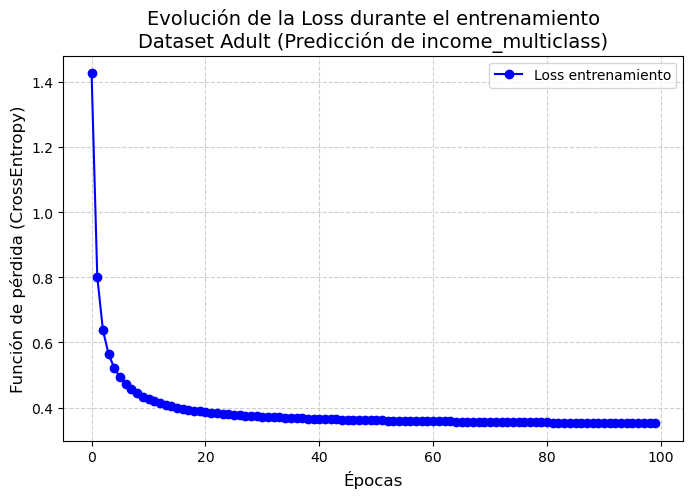

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(losses, marker="o", linestyle="-", color="b", label="Loss entrenamiento")

plt.xlabel("Épocas", fontsize=12)
plt.ylabel("Función de pérdida (CrossEntropy)", fontsize=12)
plt.title("Evolución de la Loss durante el entrenamiento\nDataset Adult (Predicción de income_multiclass)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar gráfico
plt.show()


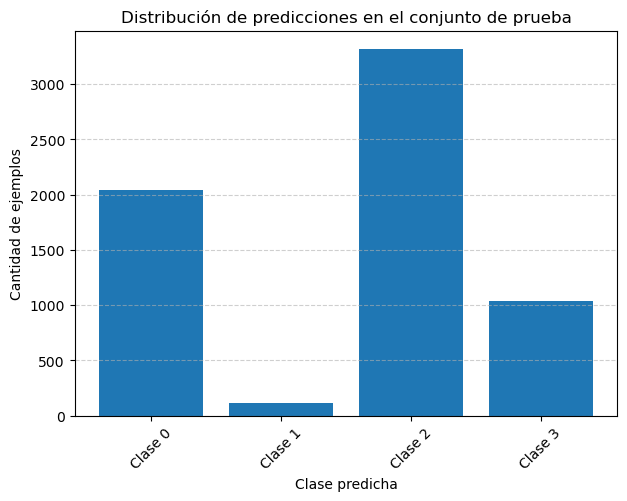

In [28]:
plt.figure(figsize=(7,5))
plt.hist(y_pred_test.numpy(), bins=np.arange(num_labels+1)-0.5, rwidth=0.8)

plt.xticks(range(num_labels), [f"Clase {i}" for i in range(num_labels)], rotation=45)
plt.xlabel("Clase predicha")
plt.ylabel("Cantidad de ejemplos")
plt.title("Distribución de predicciones en el conjunto de prueba")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
